In [133]:
#### Import library ####
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from scipy.fftpack import fft2, ifft2
from google.colab import files
uploaded = files.upload()
uploaded = files.upload()

Saving 1.bmp to 1 (2).bmp


Saving stone.jpg to stone (2).jpg


In [136]:
#### Define Image And Sensor Read Function ####
def read(path):
  output = cv.imread('{0}'.format(path) , 0)
  return output


In [143]:
#### Define Image Show Function ####
def show(image):
  plt.figure(figsize = ( 8 ,8))
  plt.imshow(image , cmap = 'gray'  )
  plt.show()

#**A)**

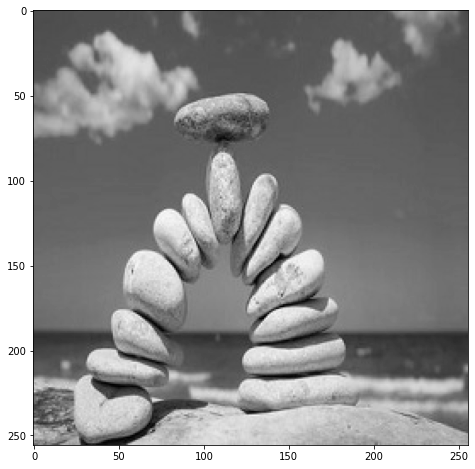

In [146]:
#### Read And Show Image ####
ReadImage = read('stone.jpg')
show(readimage)

In [147]:
#### Read Sensor ####
ReadSensor = read('1.bmp')

In [150]:
#### Define Degradation Function ####
def degrade(image, psf):
    imw = image.shape[1]
    imh = image.shape[0]
    pw = psf.shape[1]
    ph = psf.shape[0]
    psfpadding = cv.copyMakeBorder(psf, 0, imh - ph , 0, imw - pw, cv.BORDER_CONSTANT,value=0)

    PSF = fft2(psfpadding)
    IMAGE = fft2(image)  
    out = ifft2(IMAGE*PSF).real
    normout = (out - np.min(out)) / (np.max(out) - np.min(out))

    # Rescale Your Result to [0-255], Then Return Output
    return normout

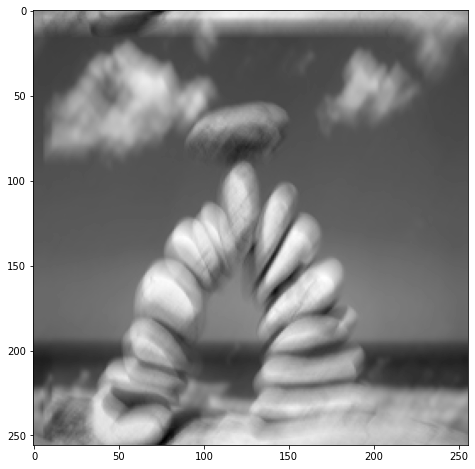

In [152]:
####    Degrade Image    ####
#### Show Degraded Image ####
final = degrade(ReadImage ,ReadSensor)
show(final)
